1. Arquivo dados.csv
    1. CODIGO
    2. MUNICIPIO
    3. PIB
    4. VALOREMPENHO
2. Empenho em diárias em municípios gaúchos e PIB do municipio
3. Execute um processo de Análise de Dados
Exploratória para conhecimento/Entendimento
deste dados

In [42]:
#Atualizado 08/12/2022 as 17:00
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import statistics as sts
import math as ma #from math import ceil #amostra Sistematica

#
from scipy import stats
from scipy.stats import norm, skewnorm, t, binom, chi2_contingency

#IMPORTANDO BIBLIOTECAS  - APRENDIZADO DE MÁQUINA
import sklearn as skl 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from yellowbrick.regressor import ResidualsPlot

#IMPORTANDO BIBLIOTECAS GRAFICAS
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as srn
import matplotlib.pyplot as plt
from plotly.figure_factory import create_distplot


In [5]:
#importando e dados 
arquivo = "./BaseDeDados/dados.csv"
dfDados = pd.read_csv(arquivo,
                      sep=";")

In [19]:
#CONHECENDO A ESRUTURA DOS DADOS
dfDados.head()
#dfDados.shape

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


In [ ]:
#VERIFICA REGISTROS NULOS/NAs
dfDados.isnull().sum()

In [ ]:
#VERIFICA A DUPLICIDADE DE CODIGOS
dfDados[dfDados.duplicated(["CODIGO"], keep= False)]

In [ ]:
#AGRUPANDO AS COLUNAS CODIGO E MUNICIPIO CODIGO	MUNICIPIO	

#CODIGO
agrupCodigo = dfDados.groupby(dfDados["CODIGO"]).size()
#MUNICIPIO
agrupMunicipio = dfDados.groupby(dfDados["MUNICIPIO"]).size()
#print(agrupCodigo, agrupMunicipio)

In [24]:
dfDados["PIB"].describe()

count       187.000000
mean      19808.741337
std       16984.223244
min        8236.630000
25%       13621.455000
50%       17206.190000
75%       21429.165000
max      223848.220000
Name: PIB, dtype: float64

Text(0.5, 1.0, 'PIB')

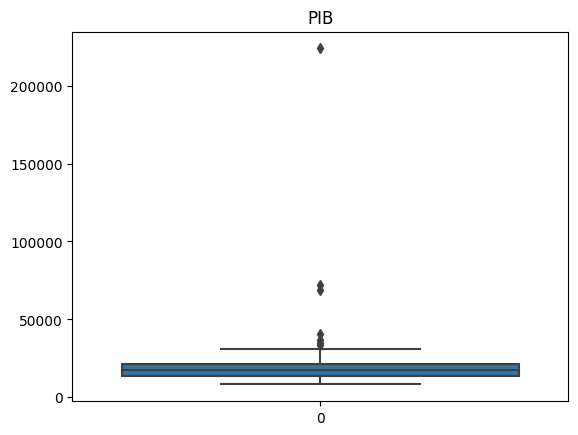

In [33]:
#GRAFICO BOXPLOT - SRN
srn.boxplot(dfDados["PIB"]).set_title("PIB")


In [34]:
#Identificando o OUTlier
#GRAFICO BOXPLOT - PLOTY
pib = dfDados["PIB"]
x = dfDados["MUNICIPIO"]
df = px.data.tips()
fig = px.box(df, x= x, y=pib, points="all")
fig.update_layout(title_text='Tit.: Boxplot PIB')

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
        x=dfDados["MUNICIPIO"],
        y=dfDados["PIB"],
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=[1, 2, 3],
            visible=True)
    ))
fig.show()

In [21]:
dfDados["VALOREMPENHO"].describe()

count    1.870000e+02
mean     1.299844e+05
std      1.615491e+05
min      1.721300e+02
25%      5.251718e+04
50%      8.422816e+04
75%      1.538961e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64

Text(0.5, 1.0, 'VALOREMPENHO')

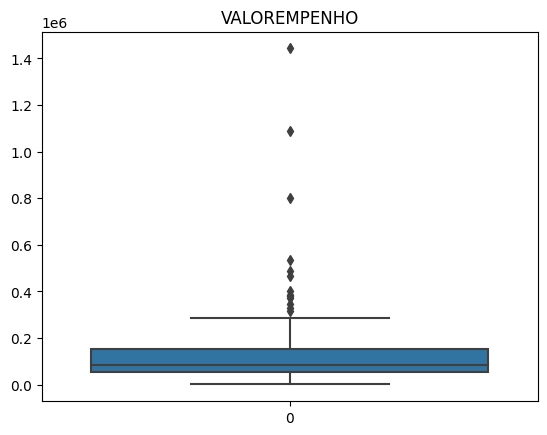

In [38]:
#GRAFICO BOXPLOT - SRN
srn.boxplot(dfDados["VALOREMPENHO"]).set_title("VALOREMPENHO")

In [39]:
pib = dfDados["VALOREMPENHO"]
x = dfDados["MUNICIPIO"]
df = px.data.tips()
fig = px.box(df, x= x, y=pib, points="all")
fig.update_layout(title_text='Tit.: Boxplot PIB')

fig.show()

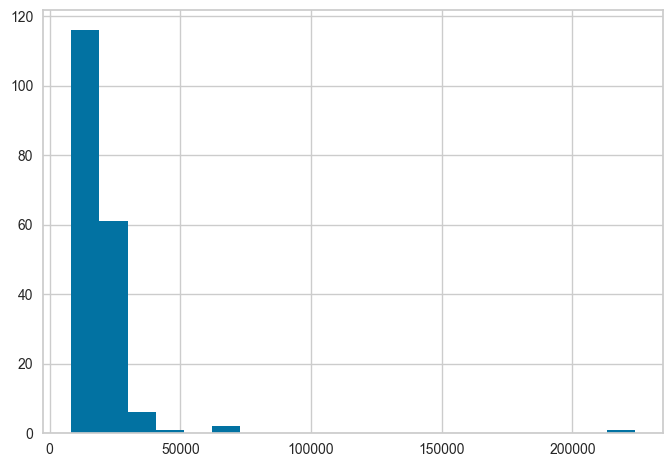

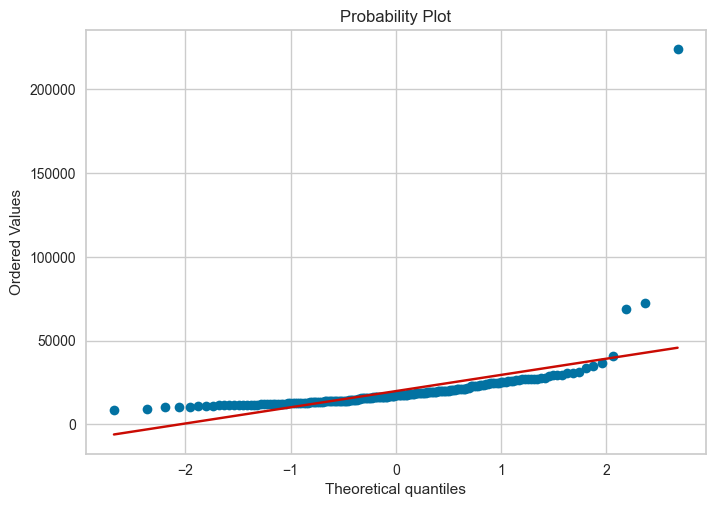

In [45]:

plt.hist(dfDados["PIB"], bins = 20)

fig, ax = plt.subplots()
stats.probplot(dfDados["PIB"], fit = True, plot = ax)
plt.show()